In [25]:
# Import 需要的套件
import os
import numpy as np
import pandas as pd

# 設定 data_path
dir_data = './data/'

In [26]:
f_app_train = os.path.join(dir_data, 'application_train.csv')
app_train = pd.read_csv(f_app_train)

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline
app_train.shape

(307511, 122)

## 練習時間

觀察有興趣的欄位的資料分佈，並嘗試找出有趣的訊息
#### Eg
- 計算任意欄位的平均數及標準差
- 畫出任意欄位的[直方圖](https://zh.wikipedia.org/zh-tw/%E7%9B%B4%E6%96%B9%E5%9B%BE)

### Hints:
- [Descriptive Statistics For pandas Dataframe](https://chrisalbon.com/python/data_wrangling/pandas_dataframe_descriptive_stats/)
- [pandas 中的繪圖函數](https://amaozhao.gitbooks.io/pandas-notebook/content/pandas%E4%B8%AD%E7%9A%84%E7%BB%98%E5%9B%BE%E5%87%BD%E6%95%B0.html)


In [59]:
# 此資料在探討貸款人的還債能力?去考慮和還債能力有關的欄位
##sample_data = app_train.iloc[np.random.randint(0, app_train.shape[0]+1, 10), ]
sample_data = app_train
# 先了解data的結構
# 欄位資料型態:float64,int64,object
print(sample_data.dtypes.value_counts())


float64    65
int64      41
object     16
dtype: int64


In [60]:
#column name of data
sample_data.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

In [62]:
#CODE_GENDER:d, 客戶性別
#AMT_INCOME_TOTAL:c, 客戶收入
#AMT_CREDIT:c, 客戶貸款金額
#CNT_FAM_MEMBERS:d, 客戶家庭人員總數
#AMT_GOODS_PRICE:c, 客戶產物貸款數


In [65]:
sum_byGender = sample_data.groupby("CODE_GENDER").sum()
sum_familyNumber = sum_byGender['CNT_FAM_MEMBERS']
sum_income = sum_byGender['AMT_INCOME_TOTAL']
# 依性別做為區分，客戶收入可負擔家中平均支出
print(sum_income)
print('* 可發現女性雖然總收入較低，但是可負擔家中平均支出卻比較多。')
ave_income = sum_income/sum_familyNumber
print(ave_income)

CODE_GENDER
F      3.158843e+10
M      2.031804e+10
XNA    7.470000e+05
Name: AMT_INCOME_TOTAL, dtype: float64
* 可發現女性雖然總收入較低，但是可負擔家中平均支出卻比較多。
CODE_GENDER
F      74308.056068
M      85783.700448
XNA    67909.090909
dtype: float64


(60000, 100000)

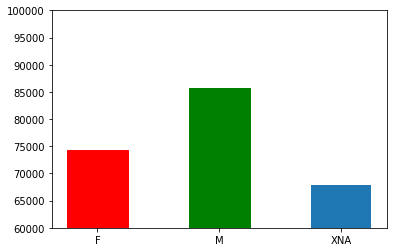

In [107]:
import matplotlib.pyplot as plt
%matplotlib inline
plt01 = pd.DataFrame({'ave':ave_income}).T
s = plt.bar(plt01.columns,
           plt01.values[0], 
           0.5,
           alpha=1)
s[0].set_color('r')
s[1].set_color('g')
plt.ylim(60000, 100000)
